<a href="https://colab.research.google.com/github/ved0507/credit-card-fraud-detection-capstone/blob/main/Credit_card_fraud_detection_Starter_code%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

# Importing DecisionTree and random forest classifier
from xgboost import XGBClassifier
from imblearn import over_sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')
# Vedavyas Burli last update 16 jan 2022 1pm

In [3]:
# Uncomment if you are running this code in google colab
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/My Drive/Upgrad-capstoneProject2022/creditcard.csv')
# df.head()

Mounted at /content/drive


## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
# Describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Define type of data /column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Handling Missing Values

### <b>Observation: As we can see there are no missing values present in dataset.</B>

In [9]:
# Checking for the missing value.
df.isnull().sum().sort_values(ascending = False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

Here we will observe the distribution of our classes

In [10]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100,2)
print('Normal Share: ',normal_share)
print('Fraud share: ',fraud_share)

Normal Share:  99.83
Fraud share:  0.17


### <b>Observation: As we can see only there is only 0.17% of fraud. Dataset is highly imbalance. Only 492 records are labelled as fraudulent data out of 284807 records</b>

In [11]:
# Count of Fraud and non-fraudulent data in dataset
# 0 represents non-fraud data
# 1 represents fraud data
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

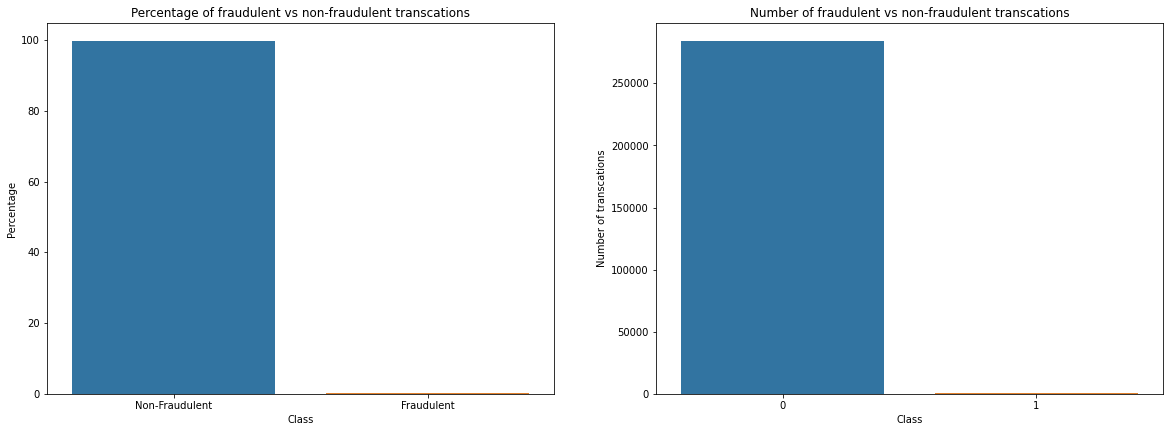

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,15))

# Percentage of fraudlent v non fraudlent transactions
plt.subplot(2,2,1)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
transaction_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_transaction_percentage = pd.DataFrame(transaction_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_transaction_percentage)

plt.subplot(2,2,2)

# Number of fraudlent v non fraudlent transactions
sns.countplot(x='Class', data=df)
plt.ylabel("Number of transcations")
plt.xlabel("Class")
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

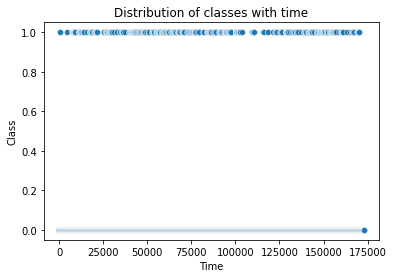

In [13]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df['Time'], y=df['Class'])
plt.title('Distribution of classes with time')
plt.show()

<b>Scatter Plot: Distribution of classes with time - We cannot infer much information as data is distributed over time.</b>

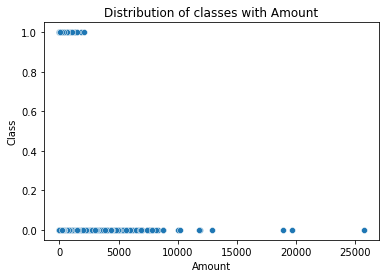

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df['Amount'], y=df['Class'])
plt.title('Distribution of classes with Amount')
plt.show()

<b>Scatter Plot: Distribution of classes with Amount - Clearly we can obser that Low amount transactions are highly fradulent than high amount transcation.</b>

In [15]:
# Drop unnecessary columns
# Dropping Time column as it is of no value while building the model
df_new = df.drop('Time',axis=1)

Dropping Time column as it is not going to assist in model building

In [16]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [17]:
# Feature variable in X and target variable in y
y = df_new['Class']
X = df_new.drop("Class", axis = 1)

In [18]:
# Split data into Train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

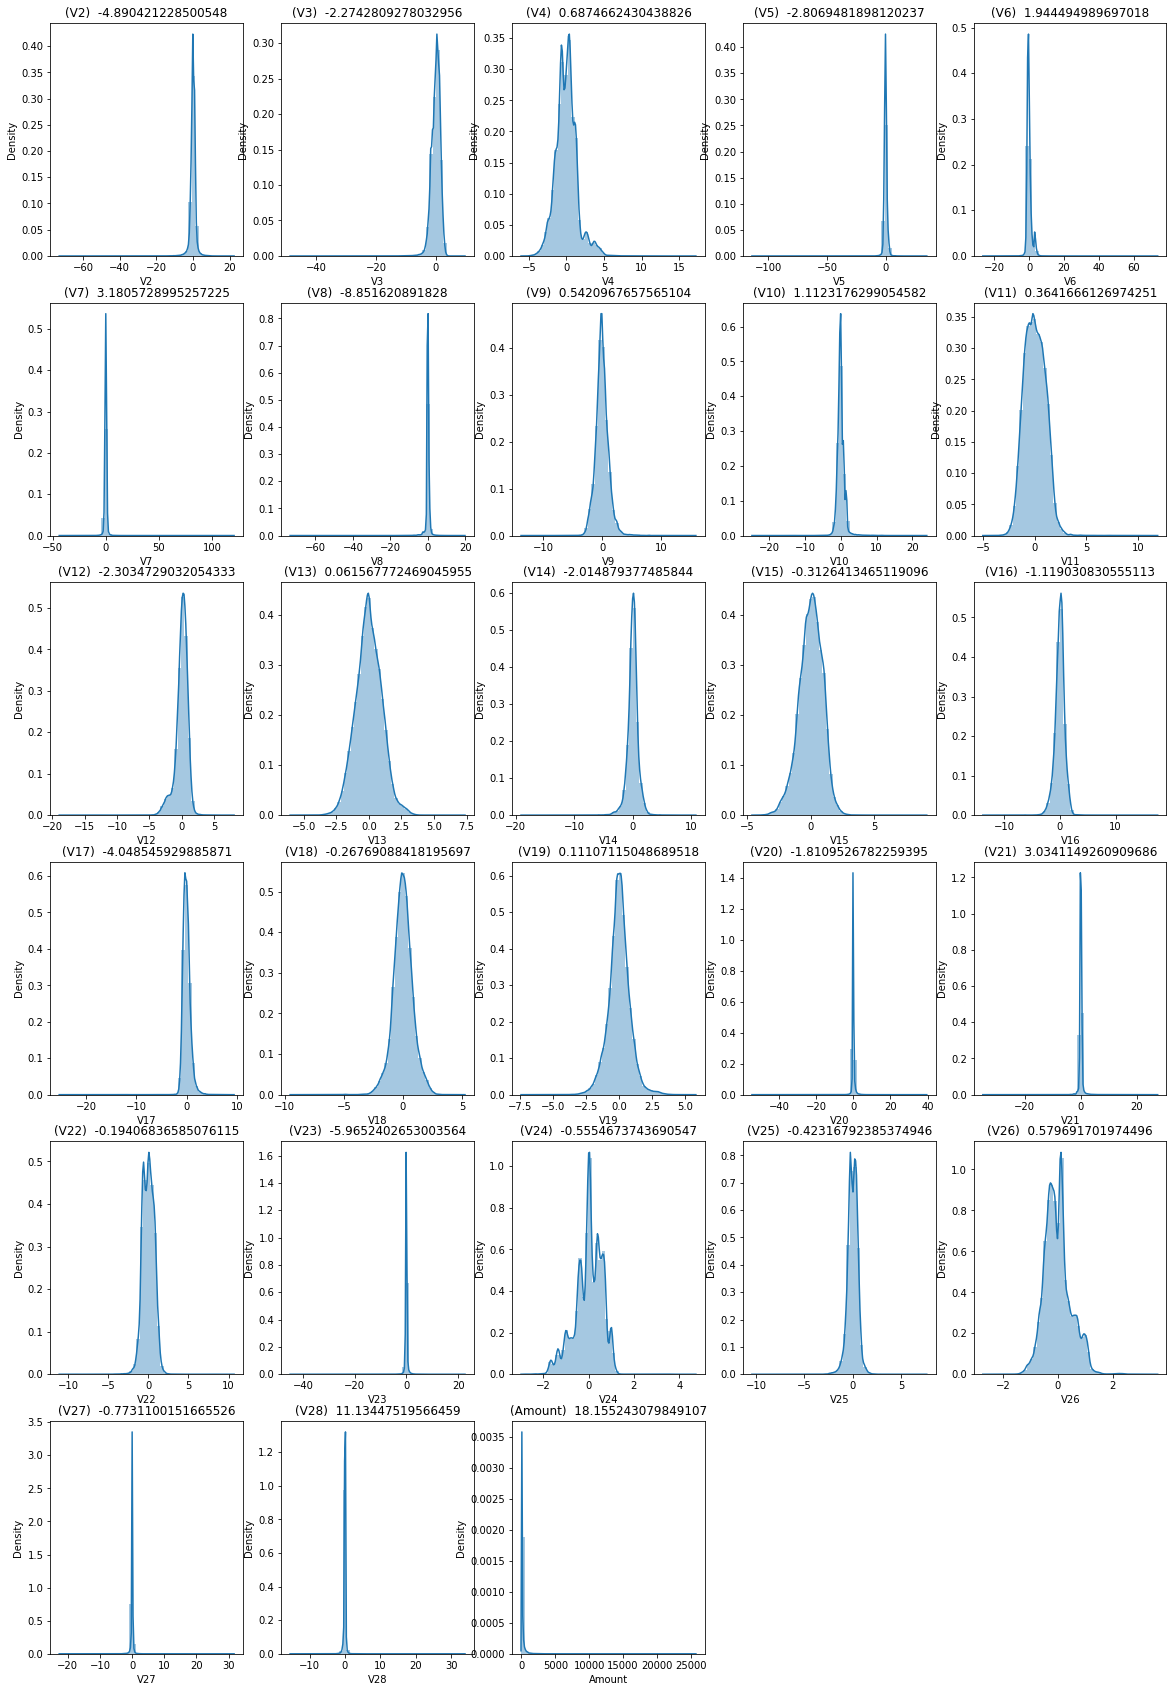

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns
plt.figure(figsize=(20,30))
for col in range(1,len(cols)) :    
    plt.subplot(6, 5,col)    
    val = cols[col]
    sns.distplot(X_train[val])    
    plt.title('('+cols[col]+')  '+str(X_train[val].skew()))
plt.show()

Apply power transform to transform the data as there are many variables which are heavily skewed. 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [21]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

 # Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

# transform test data 
X_test[cols] = pt.transform(X_test[cols])


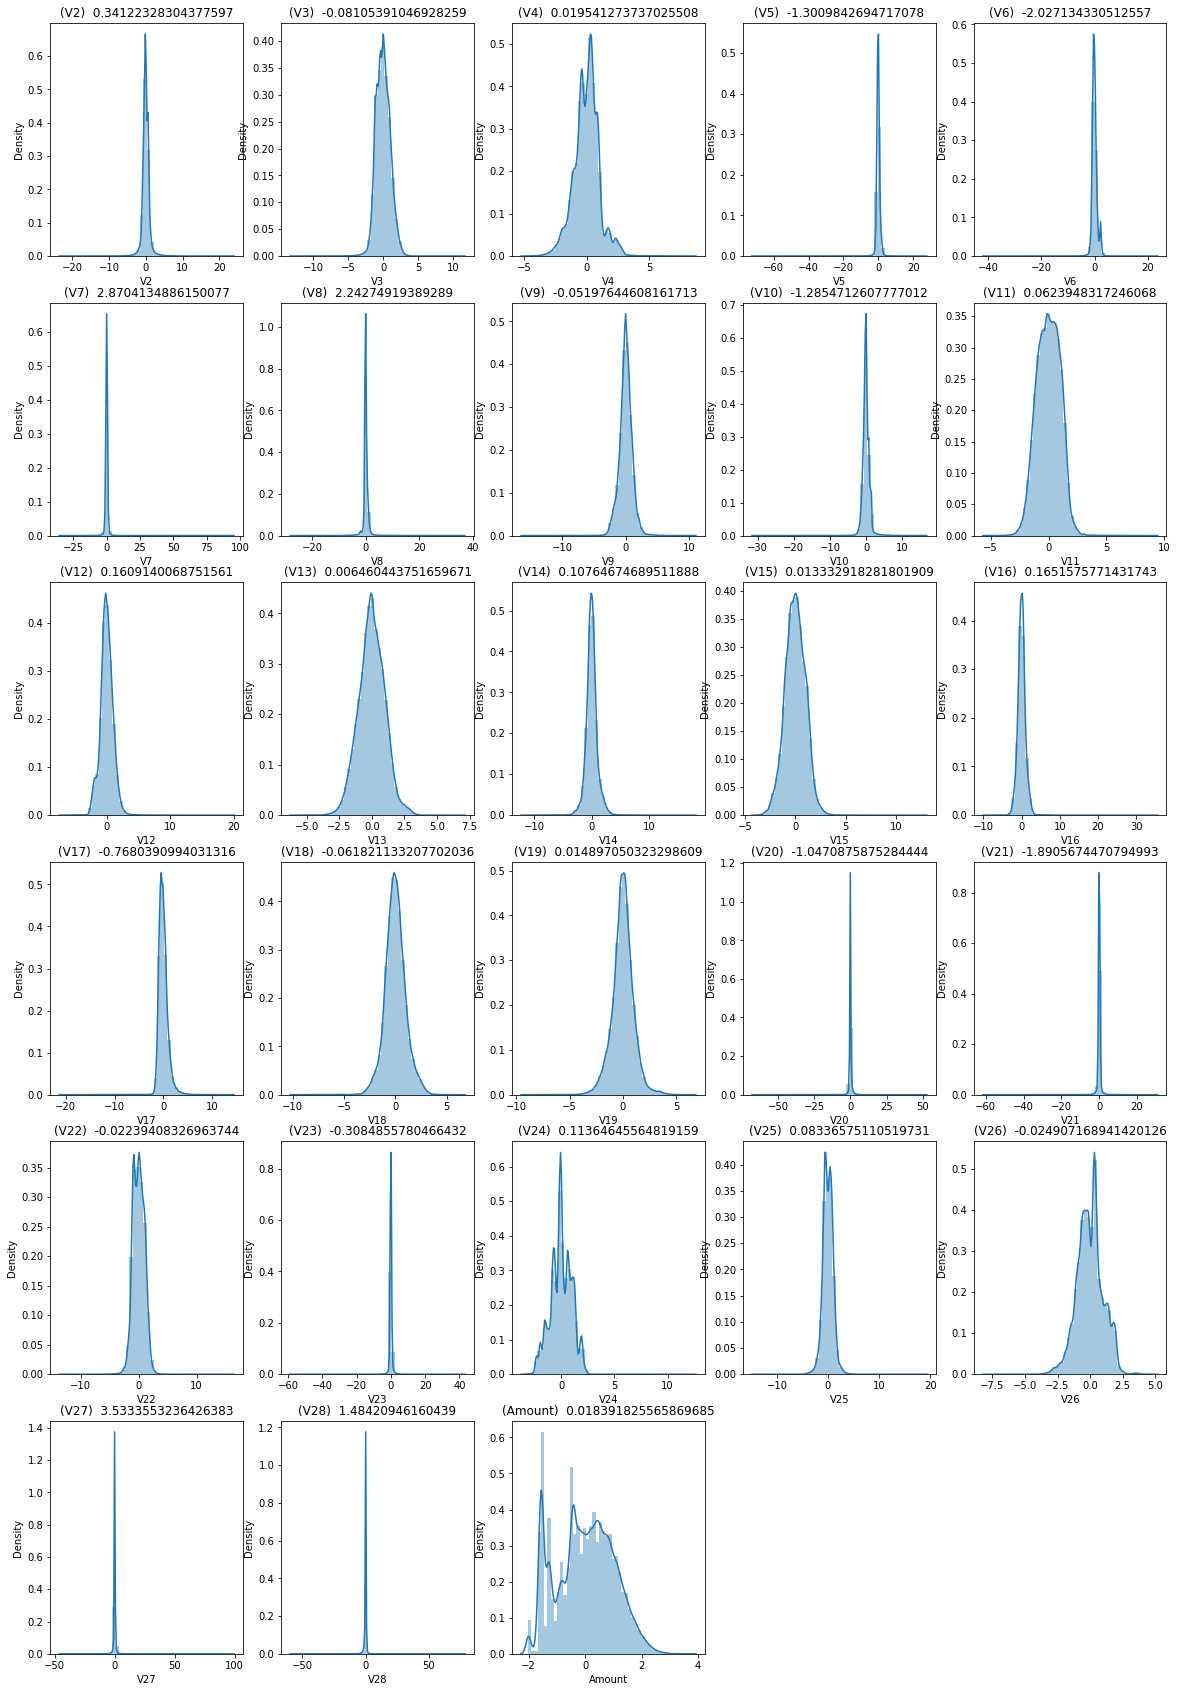

In [22]:
# plot the histogram of a variable from the dataset again to see the result 
skwed = X_train.columns
plt.figure(figsize=(20,30))
for col in range(1,len(skwed)) :    
    plt.subplot(6, 5,col)    
    val = skwed[col]
    sns.distplot(X_train[val])    
    plt.title('('+cols[col]+')  '+str(X_train[val].skew()))
plt.show()

### Observation: As we can see all the variables are normally distributed.

## Model Building
- Build different models on the imbalanced dataset and see the result

# 1. logistic regression on imbalanced data set

In [23]:
# Perform cross validation by creating KFold object with 5 splits.
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify param grid
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Gridsearch CV - scoring roc_auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model. #perform hyperparameter tuning

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [24]:
# Identify and print evaluation result by choosing a evaluation metric
print('ROC AUC score: ', model_cv.best_score_)
# print the optimum value of hyperparameters
print('Hyperparameters: ', model_cv.best_params_)

ROC AUC score:  0.9835463116331988
Hyperparameters:  {'C': 0.01}


In [25]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.764041,0.041630,0.026228,0.000422,0.01,{'C': 0.01},0.986658,0.987359,0.967658,0.982004,0.994052,0.983546,0.008825,1,0.983753,0.984446,0.988652,0.985593,0.982902,0.985069,0.001996
1,1.127171,0.065507,0.026052,0.000642,0.1,{'C': 0.1},0.985772,0.987293,0.959771,0.979933,0.992733,0.981100,0.011417,2,0.982067,0.983479,0.988109,0.983861,0.980780,0.983659,0.002478
2,1.139564,0.037133,0.028841,0.005897,1,{'C': 1},0.985476,0.986960,0.957247,0.979033,0.991993,0.980142,0.012172,3,0.981391,0.982985,0.987677,0.983116,0.980025,0.983038,0.002582
3,1.147240,0.060543,0.027968,0.004343,10,{'C': 10},0.985443,0.986895,0.956955,0.978929,0.991909,0.980026,0.012257,4,0.981298,0.982918,0.987621,0.983019,0.979933,0.982958,0.002594
4,1.149171,0.039216,0.028242,0.004640,100,{'C': 100},0.985443,0.986888,0.956916,0.978920,0.991896,0.980013,0.012269,5,0.981290,0.982911,0.987616,0.983009,0.979923,0.982950,0.002596
5,1.153508,0.013820,0.025650,0.000290,1000,{'C': 1000},0.985442,0.986888,0.956916,0.978919,0.991894,0.980012,0.012269,6,0.981290,0.982910,0.987616,0.983008,0.979922,0.982949,0.002596


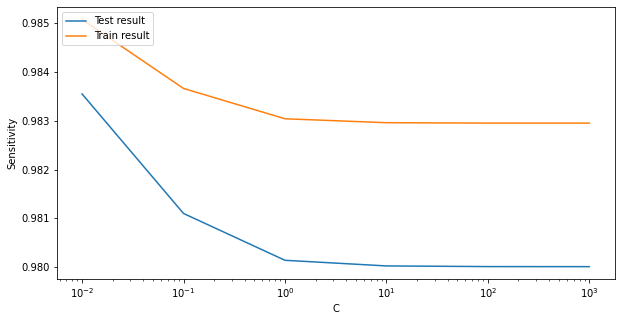

In [26]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 5))

plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

## Logistic regression with optimal C on imbalanced data

In [27]:
# Instantiating the model with best C
lr_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
lr_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [28]:
# Prediction
# Predictions on the train set
y_train_pred = lr_imb_model.predict(X_train)

In [29]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   135    261]]


In [30]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [31]:
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_train, y_train_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))


Accuracy:  0.9993
F1 Score:  0.77
Sensitivity:  0.66
Specificity:  0.9999


In [32]:
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [33]:
def plot_roccurve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [34]:
# Predicted probability
y_train_pred_proba = lr_imb_model.predict_proba(X_train)[:,1]

ROC AUC Score: 0.9849442772185892



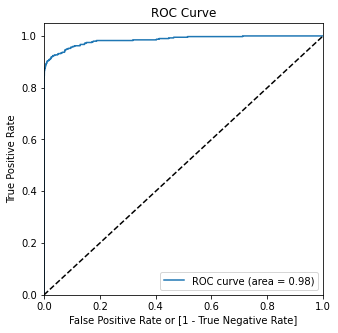

In [35]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')

plot_roccurve(y_train, y_train_pred_proba)

## ROC curve on training set area=0.98

## Prediction
- Test set

In [36]:
# Prediction on the test set
y_test_pred = lr_imb_model.predict(X_test)

In [37]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [38]:
TP = confusion[1,1] # true positive
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [39]:
# Test Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity 
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.999
F1 Score:  0.77
Sensitivity:  0.56
Specificity:  0.9997


In [40]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
# Predicted probability
y_test_pred_proba = lr_imb_model.predict_proba(X_test)[:,1]

ROC AUC Score: 0.9849442772185892



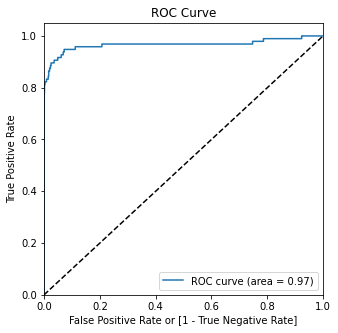

In [42]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')
plot_roccurve(y_test, y_test_pred_proba)

## ROC curve on Test set (area=0.97)

## Logistic Regression - Model summary
### Train set score in percentage
- Accuracy:  99.93 %
- F1 Score:  77.06 %
- Sensitivity:  66 %
- Specificity:  99.99 %

### Test set score in percentage
- Accuracy:  99 % 
- F1 Score:  65 % 
- Sensitivity:  56 % 
- Specificity:  99.9 %


Observation: As model learnt well during training set and performed well in test set.

# 2. Decision Tree Classifier  on imbalanced data

In [43]:
# create param grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

folds = 3

# Instantiate grid search decsion tree classifier  model
tree = DecisionTreeClassifier()

# Cross validation with 
grid_search_cv = GridSearchCV(estimator = tree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = folds, 
                           verbose = 1)

# Fit the grid search to the data
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [44]:
# Optimal ROC curve score and hyperparameter
print('ROC AUC score: ', round(grid_search_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', grid_search_cv.best_params_)

ROC AUC score:  0.938
Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [45]:
# cross validation results
grid_search_cv_results = pd.DataFrame(grid_search_cv.cv_results_)
grid_search_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.325251,0.011084,0.026344,0.002686,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923883,0.930133,0.004420,4
1,3.333887,0.028070,0.025208,0.000441,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923866,0.930128,0.004428,5
2,3.310180,0.010430,0.025768,0.002004,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,1
3,3.325348,0.012841,0.025000,0.000371,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,2
4,6.563047,0.022953,0.026855,0.000877,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917509,0.916453,0.938018,0.923993,0.009926,7
5,6.600161,0.021590,0.026113,0.000109,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924941,0.916438,0.930497,0.923959,0.005782,8
6,6.688283,0.117780,0.026476,0.000411,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933436,0.919693,0.921734,0.924954,0.006055,6
7,6.671376,0.012891,0.026393,0.000137,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933439,0.919703,0.944092,0.932412,0.009983,3


In [46]:
# Decsion tree classifier Model with optimal hyperparameters

dtc_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dtc_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

### Prediction on
- Train data set 

In [47]:
y_train_pred = dtc_imb_model.predict(X_train)

In [48]:
# Confusion matrix - dtc
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227374     75]
 [   114    282]]


In [49]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [50]:
# Train set
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_train, y_train_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.9992
F1 Score:  0.75
Sensitivity:  0.71
Specificity:  0.9997


In [51]:
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [52]:
# Predicted probability
y_train_pred_proba = dtc_imb_model.predict_proba(X_train)[:,1]

ROC AUC Score: 0.9534547393930157



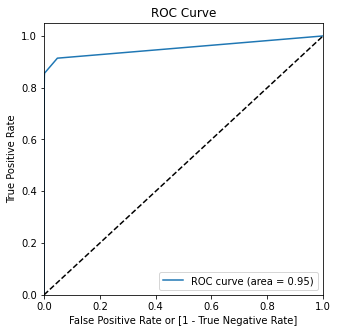

In [53]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')
plot_roccurve(y_train, y_train_pred_proba)

### Prediction
- Test set

In [54]:
y_test_pred = dtc_imb_model.predict(X_test)

In [55]:
# Confusion matrix - dtc
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [56]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [57]:
# Test set
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

Accuracy:  0.9988
F1 Score:  0.62
Sensitivity:  0.58
Specificity:  0.9995


In [58]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
# Predicted probability
y_test_pred_proba = dtc_imb_model.predict_proba(X_test)[:,1]

ROC AUC Score: 0.92174979703748



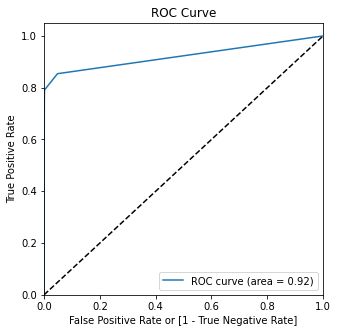

In [60]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_test, y_test_pred_proba))+'\n')
plot_roccurve(y_test, y_test_pred_proba)

## Decision Tree Classifier  - Model summary
### Train set score in percentage
- Accuracy:  99.92 %
- F1 Score:  75 %
- Sensitivity:  71 %
- Specificity:  99.97 %

### Test set score in percentage
- Accuracy:  99.88 %
- F1 Score:  62 %
- Sensitivity:  58 %
- Specificity:  99.95 %

# 3. Random Forest Classifier on imbalanced data 

In [1]:
# After importing ensamble library which contains RandomForestClassifier. 
# Specify param grid for  cv

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
rfc_grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
rfc_grid_search.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Optimal ROC curve score and hyperparameter
print('ROC AUC score: ', round(rfc_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', rfc_grid_search.best_params_)

In [ ]:
# model with best hyperparameter
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=300)

In [ ]:
rfc_imb_model.fit(X_train, y_train)

## Prediction
- train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix - RFC
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [ ]:
# Train set RFC
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_train, y_train_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

In [ ]:
print('Classification report:\n',classification_report(y_train, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = dtc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_train, y_train_pred_proba))+'\n')
plot_roccurve(y_train, y_train_pred_proba)

## Prediction
- Test set

In [ ]:
# RFC - Predictions on the test set 
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix - dtc
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [ ]:
# Test set
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),4))

# Calculate F1 Score
print('F1 Score: ', round(f1_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),4))

In [ ]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = dtc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# Plot the ROC curve
print('ROC AUC Score: '+str(metrics.roc_auc_score(y_test, y_test_pred_proba))+'\n')
plot_roccurve(y_test, y_test_pred_proba)

## RandomForest Classifier  - Model summary - Imbalanced data set
### Train set score in percentage
- Accuracy:  99.94 %
- F1 Score:  81 %
- Sensitivity:  74 %
- Specificity:  99.98 %

### Test set score in percentage
- Accuracy:  99.9 %
- F1 Score:  69 %
- Sensitivity:  65 %
- Specificity:  99.96 %


# 4. XGBoost on imbalance dataset

In [61]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xgb_model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [62]:
# Optimal ROC curve score and hyperparameter XgBoost
print('ROC AUC score: ', round(xgb_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', xgb_model_cv.best_params_)
print(xgb_model_cv.best_estimator_)

ROC AUC score:  0.978
Hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.3}
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.3)


In [63]:
# cross validation results
xgb_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,29.521178,0.669129,0.347744,0.000719,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,38.733211,0.509653,0.353131,0.002063,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976568,0.972788,0.977688,0.975682,0.002096,3,0.999965,0.999987,0.999966,0.999973,0.000010
2,40.955887,0.237237,0.349452,0.015419,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,29.460937,0.363645,0.362415,0.005447,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.968098,0.974481,0.973309,0.971963,0.002774,6,1.000000,1.000000,0.999995,0.999998,0.000002
4,37.324118,0.216785,0.361219,0.002756,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968621,0.965527,0.982247,0.972132,0.007263,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,40.042175,0.535619,0.359526,0.005398,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973489,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [64]:
# model with best hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

## Prediction
- Train set

In [65]:
y_train_pred = xgb_imb_model.predict(X_train)
print('Classification report:\n',classification_report(y_train, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845



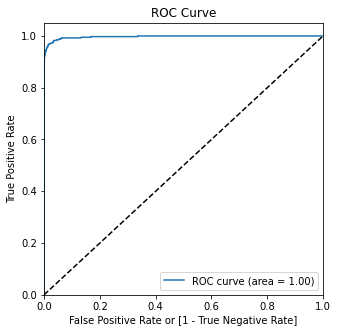

In [66]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roccurve(y_train, y_train_pred_proba_imb_xgb)

## Prediction
- test set

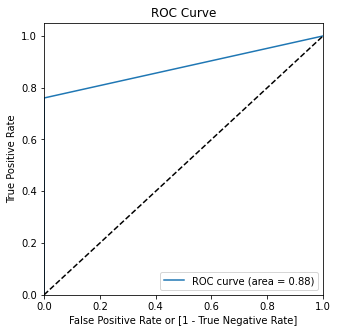

In [67]:
y_test_pred = xgb_imb_model.predict(X_test)
plot_roccurve(y_test, y_test_pred)

In [68]:
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



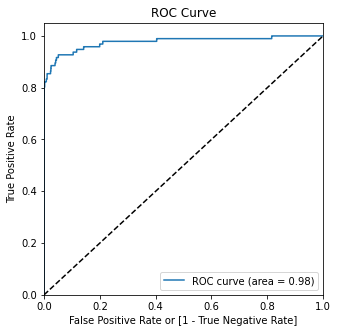

In [69]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## XGBOOST  - Model summary on imbalanced data set
### Train set score 
- ROC score 100 %
- F1 score 90%

### Test set score
- ROC score 98 %
- F1 score 80 %

<b>Observation and conclusion: XGBoost has given good result on unbalanced data.  ROC-AUC train= 100% and Test = 98%</b>

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


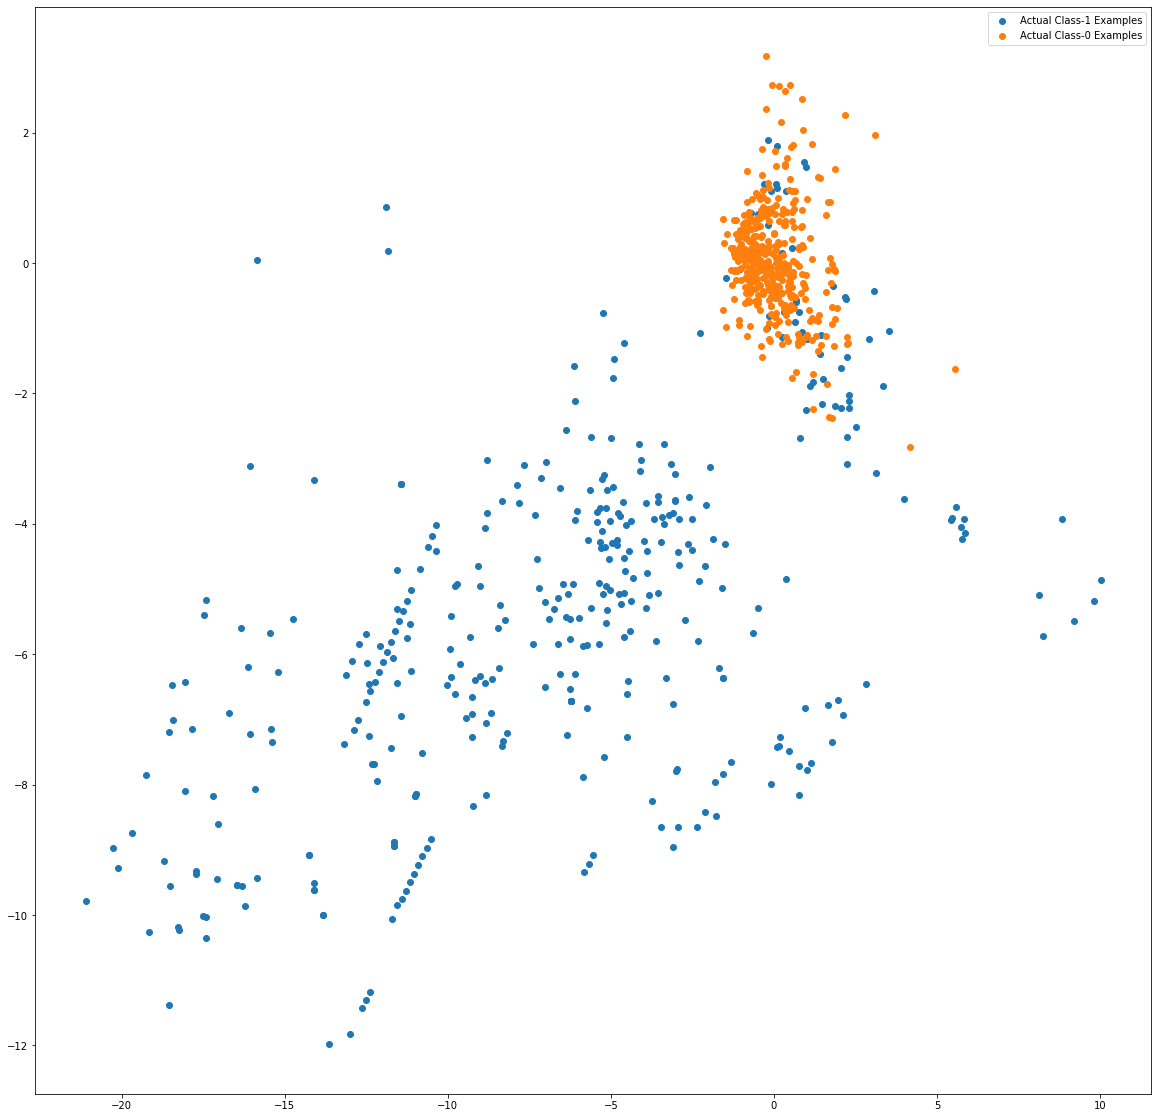

In [70]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Random Oversampling

In [71]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [72]:
# Befor sampling class distribution
print('Before sampling class distribution: ',Counter(y_train))
# new class distribution 
print('\nNew class distribution: ',Counter(y_over))

Before sampling class distribution:  Counter({0: 227449, 1: 396})

New class distribution:  Counter({0: 227449, 1: 227449})


## 1. Logistic Regression - with random oversampling

In [73]:
# Creating KFold object with 5 splits
splits = 5
folds = KFold(n_splits=splits, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
lr_ros_model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_ros_model_cv.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [74]:
# Optimal ROC curve score and hyperparameter XgBoost
print('ROC AUC score: ', round(lr_ros_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', lr_ros_model_cv.best_params_)
print(lr_ros_model_cv.best_estimator_)

ROC AUC score:  0.989
Hyperparameters:  {'C': 100}
LogisticRegression(C=100)


In [75]:
# cross validation results
lr_ros_cv_results = pd.DataFrame(lr_ros_model_cv.cv_results_)
lr_ros_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.135128,0.047667,0.045670,0.000381,0.01,{'C': 0.01},0.989087,0.988859,0.988768,0.988699,0.988934,0.988869,0.000135,6,0.988856,0.988817,0.988917,0.988995,0.988825,0.988882,0.000067
1,2.200034,0.091628,0.045723,0.000708,0.1,{'C': 0.1},0.989097,0.988874,0.988784,0.988705,0.988954,0.988883,0.000136,5,0.988875,0.988832,0.988932,0.989004,0.988839,0.988896,0.000064
2,2.205116,0.097640,0.046927,0.001672,1,{'C': 1},0.989097,0.988877,0.988786,0.988702,0.988954,0.988883,0.000136,3,0.988877,0.988832,0.988933,0.989003,0.988837,0.988896,0.000064
3,2.169905,0.088204,0.045191,0.000111,10,{'C': 10},0.989097,0.988876,0.988786,0.988701,0.988955,0.988883,0.000137,4,0.988877,0.988832,0.988933,0.989003,0.988837,0.988896,0.000064
4,2.221729,0.108569,0.045633,0.000185,100,{'C': 100},0.989097,0.988877,0.988786,0.988702,0.988955,0.988883,0.000137,1,0.988877,0.988832,0.988933,0.989003,0.988837,0.988896,0.000065
5,2.229163,0.108579,0.046758,0.002679,1000,{'C': 1000},0.989097,0.988877,0.988786,0.988702,0.988955,0.988883,0.000137,2,0.988877,0.988832,0.988933,0.989003,0.988837,0.988896,0.000064


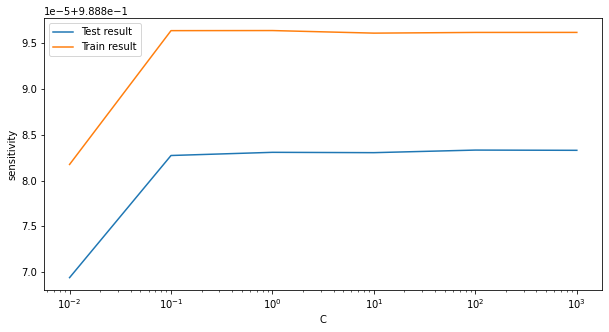

In [76]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(lr_ros_cv_results['param_C'], lr_ros_cv_results['mean_test_score'])
plt.plot(lr_ros_cv_results['param_C'], lr_ros_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [77]:
print(lr_ros_model_cv.best_params_)

{'C': 100}


In [78]:
# Instantiating the model
logreg_oversample = LogisticRegression(C=0.1)

# Fitting the model with train data
logreg_oversample_model = logreg_oversample.fit(X_over, y_over)

## Evaluation
- Train set

In [79]:
# Predictions on the train set
y_train_pred = logreg_oversample_model.predict(X_over)
print('Classification report:\n',classification_report(y_over, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.93      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



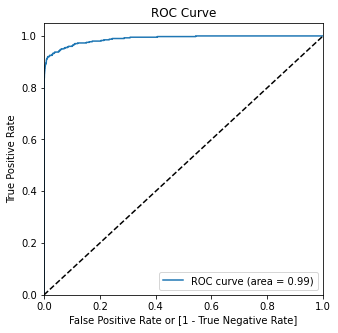

In [80]:
# Predicted probability
y_train_pred_proba = logreg_oversample_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
plot_roccurve(y_over, y_train_pred_proba)

## Evaluation
- Test set

In [81]:
# Evaluating on test data
y_test_pred = logreg_oversample_model.predict(X_test)

print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



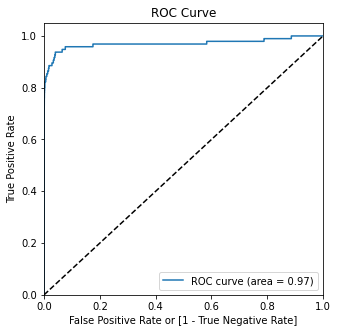

In [82]:
# Predicted probability
y_test_pred_proba = logreg_oversample_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Logistic regression  with random oversampleing - Model summary 
### Train set score 
- ROC score 99 %
- F1 score 95%

### Test set score
- ROC score 97 %
- F1 score 11 %


observation: Huge difference between train and test F1 score 

# 2. Decision Tree Classifier with Random oversampling

In [83]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree_os = DecisionTreeClassifier()

dtree_os_grid_search = GridSearchCV(estimator = dtree_os, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
dtree_os_grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [84]:
# Optimal ROC curve score and hyperparameter decision tree classifier 
print('ROC AUC score: ', round(dtree_os_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', dtree_os_grid_search.best_params_)
print(dtree_os_grid_search.best_estimator_)

ROC AUC score:  1.0
Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [85]:
# cross validation results
dtree_os_cv_results = pd.DataFrame(dtree_os_grid_search.cv_results_)
dtree_os_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.856145,0.058325,0.077986,0.000689,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990138,0.990459,0.991038,0.990545,0.000372,5
1,5.756003,0.012332,0.080967,0.002715,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990138,0.990459,0.991023,0.990540,0.000366,6
2,5.819455,0.030918,0.080782,0.004768,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990109,0.990468,0.990809,0.990462,0.000286,8
3,5.765416,0.031869,0.082257,0.001943,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990118,0.990468,0.990809,0.990465,0.000282,7
4,9.137446,0.026623,0.085065,0.006149,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999510,0.999630,0.999625,0.999588,0.000055,2
5,9.098689,0.106220,0.086655,0.005298,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999575,0.999647,0.999614,0.999612,0.000029,1
6,8.970625,0.045774,0.082223,0.004482,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999551,0.999594,0.999472,0.999539,0.000051,4
7,9.008408,0.018840,0.073503,0.013468,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999530,0.999651,0.999457,0.999546,0.000080,3


In [86]:
# Model with optimal hyperparameters
dt_oversample_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_oversample_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

## Prediction 
- Train set

In [87]:
# Predictions on the train set
y_train_pred = dt_oversample_model.predict(X_over)
print('Classification report:\n',classification_report(y_over, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



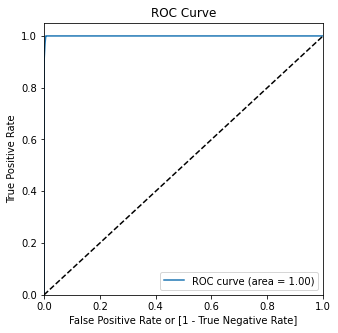

In [88]:
# Predicted probability
y_train_pred_proba = dt_oversample_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
plot_roccurve(y_over, y_train_pred_proba)

## Prediction
- Test set

In [89]:
# Predictions on the train set
y_test_pred = dt_oversample_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962



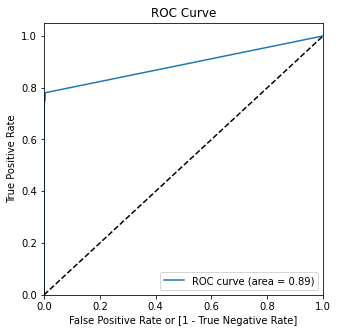

In [90]:
# Predicted probability
y_test_pred_proba = dt_oversample_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Decision tree  with random oversampleing - Model summary 
### Train set score 
- ROC score 100 %
- F1 score 100 %

### Test set score
- ROC score 89 %
- F1 score 26 %

## Model Building
- Build different models on the balanced dataset and see the result

# 3. XGBoost with Random oversampling

In [91]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_over_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xbg_over_model_cv = GridSearchCV(estimator = xgb_over_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xbg_over_model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [92]:
# Optimal ROC curve score and hyperparameter decision tree classifier 
print('ROC AUC score: ', round(xbg_over_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', xbg_over_model_cv.best_params_)
print(xbg_over_model_cv.best_estimator_)

ROC AUC score:  1.0
Hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.9}
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


In [93]:
# cross validation results
xbg_over_model_cv_results = pd.DataFrame(xbg_over_model_cv.cv_results_)
xbg_over_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,55.538691,0.227698,0.680742,0.001943,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999912,0.999930,0.999912,0.999918,0.000008,4,0.999929,0.999929,0.999929,0.999929,1.498814e-07
1,65.448713,0.077323,0.692656,0.005357,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999909,0.999924,0.999915,0.999916,0.000006,5,0.999919,0.999930,0.999936,0.999928,6.877731e-06
2,65.063841,0.207681,0.669945,0.008569,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999910,0.999922,0.999910,0.999914,0.000005,6,0.999922,0.999920,0.999931,0.999924,4.899287e-06
3,55.404478,0.037714,0.696533,0.007585,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999999,0.999989,0.999977,0.999988,0.000009,2,0.999998,0.999998,1.000000,0.999999,1.000326e-06
4,65.481898,0.141228,0.686663,0.003828,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999996,0.999985,0.999974,0.999985,0.000009,3,0.999999,0.999998,0.999999,0.999999,4.633237e-07
5,65.129642,0.233565,0.692983,0.007154,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999998,0.999992,0.999979,0.999989,0.000008,1,0.999998,0.999998,0.999999,0.999999,4.629456e-07


In [94]:
# Use optimal hyperparameter build model
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_optimal_model = XGBClassifier(params = params)
xgb_optimal_model.fit(X_over, y_over)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [95]:
# Predictions on the train set
y_train_pred = xgb_optimal_model.predict(X_over)
print('Classification report:\n',classification_report(y_over, y_train_pred))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



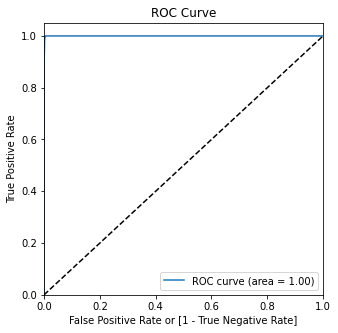

In [96]:
# Predicted probability
y_train_pred_proba = xgb_optimal_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
plot_roccurve(y_over, y_train_pred_proba)

## Model evaluation on Test set

In [97]:
y_pred = xgb_optimal_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.24      0.82      0.37        96

    accuracy                           1.00     56962
   macro avg       0.62      0.91      0.68     56962
weighted avg       1.00      1.00      1.00     56962



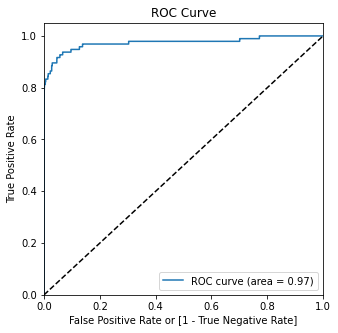

In [98]:
# Predicted probability
y_test_pred_proba = xgb_optimal_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## XGBoost with random oversampleing - Model summary 
### Train set score 
- ROC score 100 %
- F1 score 100 %

### Test set score
- ROC score 97 %
- F1 score 37 %

### Print the class distribution after applying SMOTE - Synthetic Minority Oversampling Technique

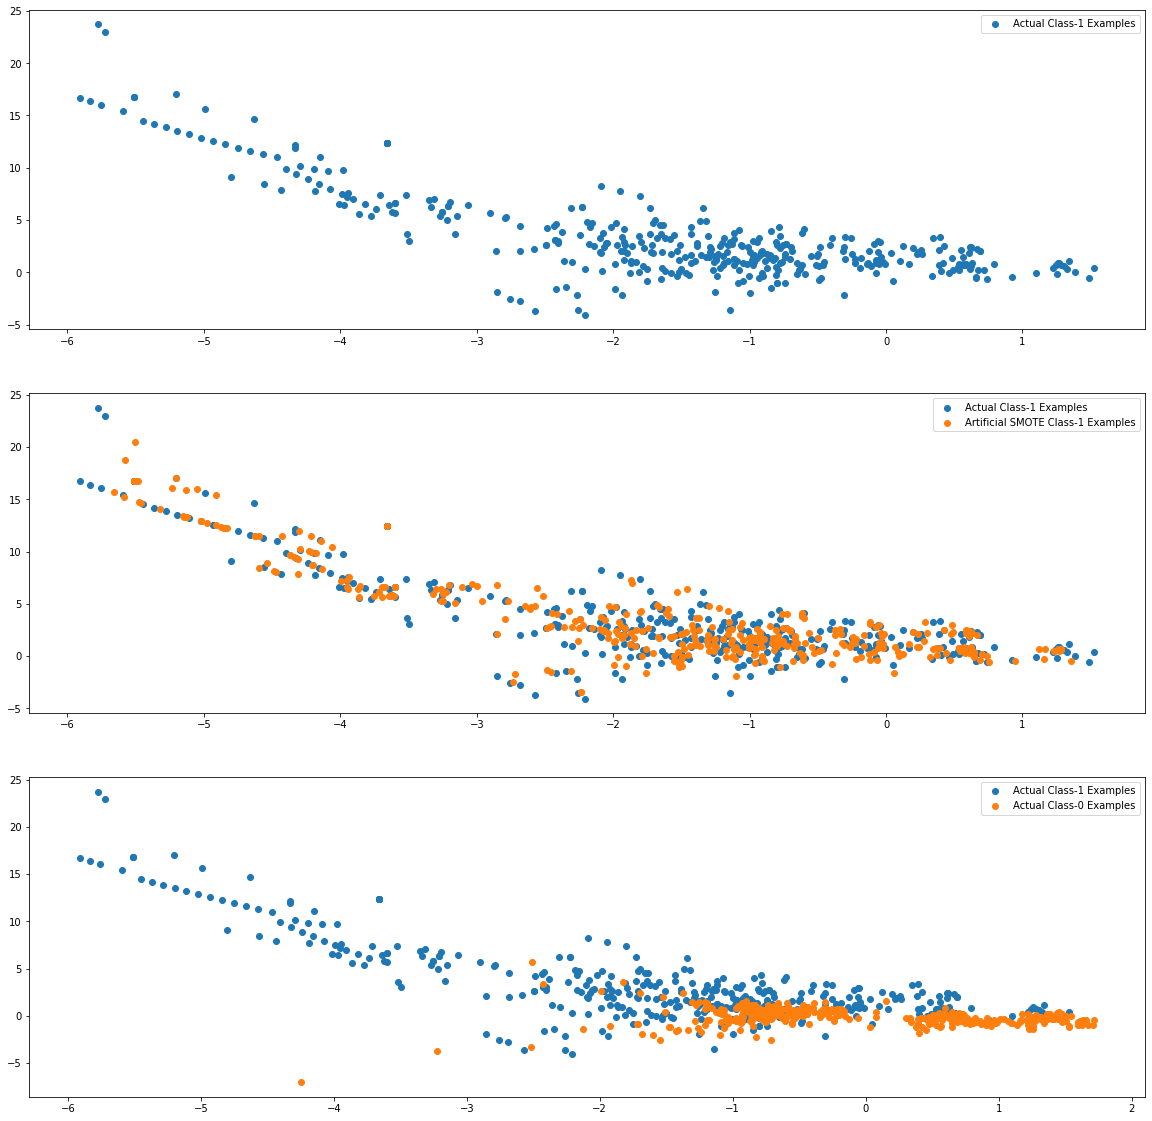

In [99]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

##### Build models on other algorithms to see the better performing on SMOTE

# 1. Logistic rregrssion with SMOTE on balanced data

In [100]:
# Creating KFold object with 5 splits
splits = 5
folds = KFold(n_splits=splits, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
lr_model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [101]:
# Optimal ROC curve score and hyperparameter Logistic regression with SMOTE
print('ROC AUC score: ', round(lr_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', lr_model_cv.best_params_)
print(lr_model_cv.best_estimator_)

ROC AUC score:  0.99
Hyperparameters:  {'C': 0.1}
LogisticRegression(C=0.1)


In [102]:
# cross validation results
lr_model_cv_results = pd.DataFrame(lr_model_cv.cv_results_)
lr_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.059668,0.045743,0.049815,0.002562,0.01,{'C': 0.01},0.990278,0.989829,0.990046,0.989499,0.989786,0.989888,0.000262,6,0.989828,0.989867,0.989874,0.990034,0.989909,0.989902,0.000071
1,2.083762,0.026291,0.050695,0.004344,0.1,{'C': 0.1},0.990280,0.989842,0.990062,0.989490,0.989813,0.989897,0.000264,1,0.989843,0.989880,0.989880,0.990039,0.989920,0.989912,0.000068
2,2.165770,0.075628,0.047771,0.000240,1,{'C': 1},0.990278,0.989842,0.990062,0.989487,0.989815,0.989897,0.000265,2,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067
3,2.104297,0.062734,0.049596,0.003484,10,{'C': 10},0.990278,0.989842,0.990062,0.989486,0.989815,0.989896,0.000265,5,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067
4,2.100135,0.084620,0.047900,0.000577,100,{'C': 100},0.990278,0.989842,0.990062,0.989486,0.989815,0.989896,0.000265,4,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067
5,2.111740,0.077434,0.048396,0.001493,1000,{'C': 1000},0.990278,0.989842,0.990062,0.989486,0.989815,0.989896,0.000265,3,0.989843,0.989880,0.989879,0.990037,0.989919,0.989912,0.000067


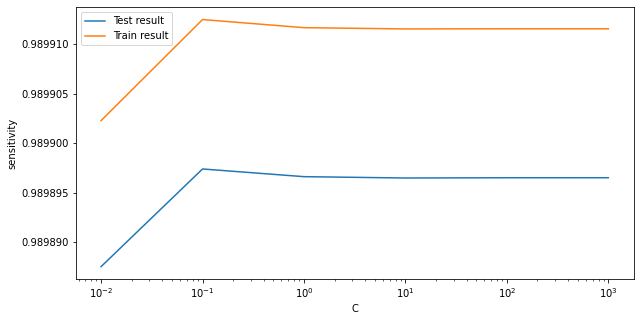

In [103]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_test_score'])
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [104]:
# Instantiating the model
lr_smote_model = LogisticRegression(C=0.1)

# Fitting the model with balanced data
lr_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1)

## model Evaluation on Train set

In [105]:
# Evaluating model on train set
y_train_pred = lr_smote_model.predict(X_train_smote)
print('Classification report:\n',classification_report(y_train_smote, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



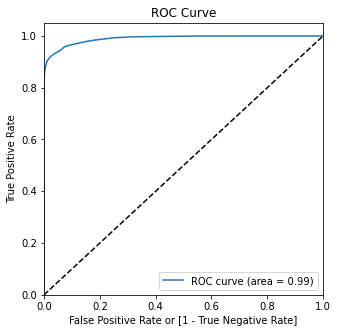

In [106]:
# Predicted probability
y_train_pred_proba_smote = lr_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roccurve(y_train_smote, y_train_pred_proba_smote)

## model evaluation on test set

In [107]:
# Evaluating on test data
y_test_pred = lr_smote_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



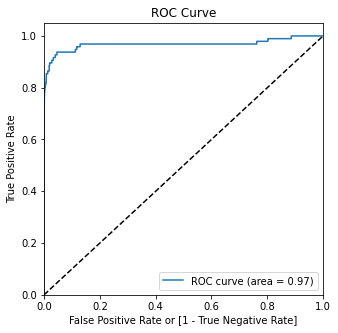

In [108]:
# Predicted probability
y_test_pred_proba_smote = lr_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba_smote)

## Logistic regression  with SMOTE - Model summary 
### Train set score
- ROC score 99 %
- F1 score 95 %

### Test set score
- ROC score 97 %
- F1 score 11 %

# 2. Decision tree with SMOTE on balanced data

In [109]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
dt_grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [110]:
# Optimal ROC curve score and hyperparameter Decision tree classifier with SMOTE
print('ROC AUC score: ', round(dt_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', dt_grid_search.best_params_)
print(dt_grid_search.best_estimator_)

ROC AUC score:  0.998
Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [111]:
# cross validation results
dtc_model_cv_results = pd.DataFrame(dt_grid_search.cv_results_)
dtc_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.292796,0.038815,0.078048,0.001793,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986483,0.985618,0.985514,0.985872,0.000434,6
1,9.203171,0.055674,0.085267,0.003371,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986496,0.985651,0.985514,0.985887,0.000434,5
2,9.201253,0.034974,0.080761,0.003363,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986460,0.985584,0.985459,0.985834,0.000445,8
3,9.312773,0.143272,0.083401,0.003984,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986445,0.985627,0.985447,0.985840,0.000434,7
4,17.197620,0.087925,0.095805,0.014001,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997839,0.997964,0.997475,0.997759,0.000208,3
5,17.185201,0.025353,0.087870,0.005005,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997827,0.998044,0.997457,0.997776,0.000242,1
6,17.083899,0.028064,0.082479,0.000151,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997853,0.997915,0.997520,0.997763,0.000174,2
7,17.187167,0.096128,0.073604,0.015289,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997843,0.997930,0.997434,0.997736,0.000216,4


In [112]:
# build model with optimal hyperparameter
dtc_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dtc_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

# Model Evaluation
- Prediction on train set

In [113]:
# Predictions on the train set
y_train_pred_smote = dtc_smote_model.predict(X_train_smote)
print('Classification report:\n',classification_report(y_train_smote, y_train_pred_smote))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



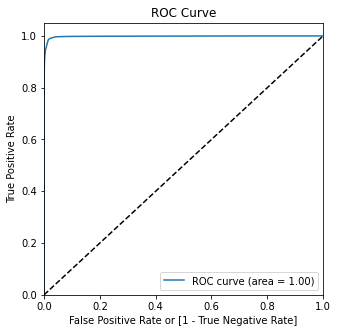

In [114]:
# Predicted probability
y_train_pred_proba = dtc_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roccurve(y_train_smote, y_train_pred_proba)

## Model Evaluation
- Prediction on Test set 

In [115]:
# Predictions on the Test set
y_test_pred_smote = dtc_smote_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred_smote))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.78      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.56     56962
weighted avg       1.00      0.98      0.99     56962



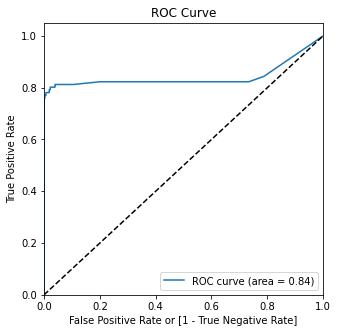

In [116]:
# Predicted probability
y_test_pred_proba = dtc_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Decision tree classifie  with SMOTE - Model summary 
### Train set score
- ROC score 100 %
- F1 score 99 %

### Test set score
- ROC score 84 %
- F1 score 12 %

# 3. XGBoost with SMOTE on balanced data

In [117]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xgb_model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [118]:
# Optimal ROC curve score and hyperparameter XGBoost with SMOTE
print('ROC AUC score: ', round(xgb_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', xgb_model_cv.best_params_)
print(xgb_model_cv.best_estimator_)

ROC AUC score:  1.0
Hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.6}
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.6)


In [119]:
# cross validation results
xgb_model_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,63.583264,0.711056,0.689030,0.002365,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999682,0.999756,0.999703,0.999714,0.000031,4,0.999743,0.999740,0.999736,0.999740,2.772898e-06
1,80.457927,0.181887,0.690885,0.014154,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999687,0.999758,0.999650,0.999698,0.000045,6,0.999738,0.999753,0.999723,0.999738,1.194556e-05
2,84.259255,0.204755,0.683679,0.008582,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999681,0.999739,0.999691,0.999704,0.000025,5,0.999727,0.999731,0.999747,0.999735,8.458847e-06
3,63.096703,0.133011,0.703262,0.011339,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999951,0.999955,0.999951,0.999952,0.000002,3,0.999976,0.999976,0.999977,0.999976,5.111610e-07
4,80.303129,0.131839,0.696422,0.004457,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999967,0.999962,0.999959,0.999963,0.000003,1,0.999983,0.999987,0.999983,0.999984,1.993600e-06
5,83.774691,0.177170,0.703834,0.011584,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999963,0.999957,0.999955,0.999958,0.000003,2,0.999982,0.999982,0.999984,0.999983,1.060060e-06


In [120]:
#  build model with optimal hyperparameter
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# instanciate Model
xgb_smote_model = XGBClassifier(params = params)

# fit model on training data
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

## model Evaluation
- Prediction on train set

In [121]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
print('Classification report:\n',classification_report(y_train_smote, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227449
           1       0.99      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



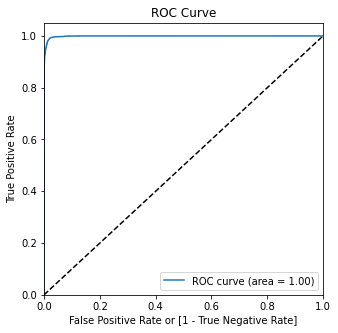

In [122]:
# Predicted probability.
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_smote, y_train_pred_proba)

## Model Evaluation
- Prediction on Test set

In [123]:
y_pred = xgb_smote_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.83      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



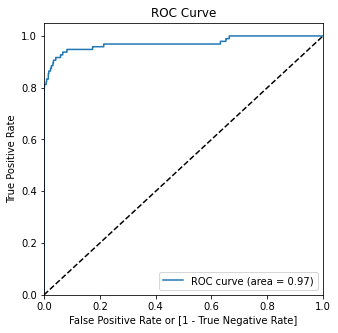

In [124]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## XGBoost with SMOTE on balanced data set - Model summary 
### Train set score
- ROC score 100 %
- F1 score 98 %

### Test set score
- ROC score 97 %
- F1 score 19 %

### Print the class distribution after applying ADASYN

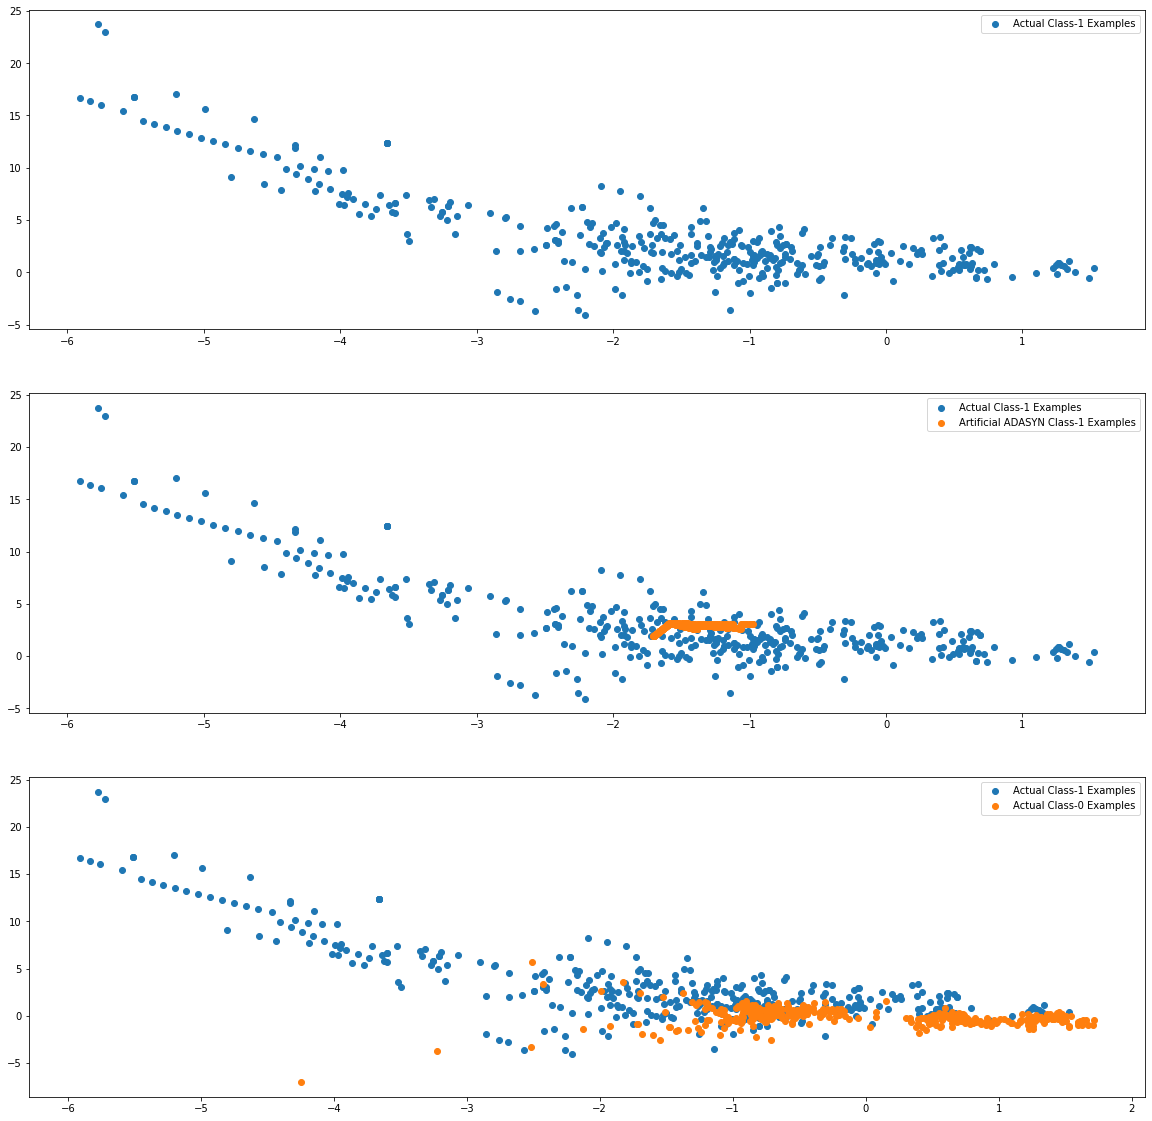

In [125]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

##### Build models on other algorithms to see the better performing on ADASYN

# 1. Logistic regression with ADASYN on balanced data

In [126]:
# Creating KFold object with 3 splits
splits = 3
folds = KFold(n_splits=splits, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
lr_model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [127]:
# Optimal ROC curve score and hyperparameter Logistic regression with ADASYN
print('ROC AUC score: ', round(lr_model_cv.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', lr_model_cv.best_params_)
print(lr_model_cv.best_estimator_)

ROC AUC score:  0.964
Hyperparameters:  {'C': 1000}
LogisticRegression(C=1000)


In [128]:
# cross validation results
lr_model_cv_results = pd.DataFrame(lr_model_cv.cv_results_)
lr_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.597382,0.049465,0.082086,0.004555,0.01,{'C': 0.01},0.963866,0.963585,0.964221,0.963891,0.000260,6,0.963869,0.963928,0.963940,0.963912,0.000031
1,1.755909,0.046483,0.078359,0.000149,0.1,{'C': 0.1},0.963957,0.963668,0.964301,0.963976,0.000259,5,0.963960,0.964007,0.964019,0.963995,0.000026
2,1.842677,0.125402,0.079353,0.000443,1,{'C': 1},0.963962,0.963674,0.964306,0.963981,0.000259,4,0.963965,0.964011,0.964025,0.964001,0.000026
3,1.862518,0.152170,0.077978,0.000341,10,{'C': 10},0.963963,0.963674,0.964307,0.963981,0.000259,3,0.963966,0.964012,0.964026,0.964001,0.000026
4,1.842478,0.143165,0.082036,0.004237,100,{'C': 100},0.963963,0.963674,0.964307,0.963981,0.000259,2,0.963966,0.964012,0.964026,0.964001,0.000026
5,1.842538,0.140785,0.084793,0.002060,1000,{'C': 1000},0.963963,0.963674,0.964307,0.963981,0.000259,1,0.963966,0.964012,0.964026,0.964001,0.000026


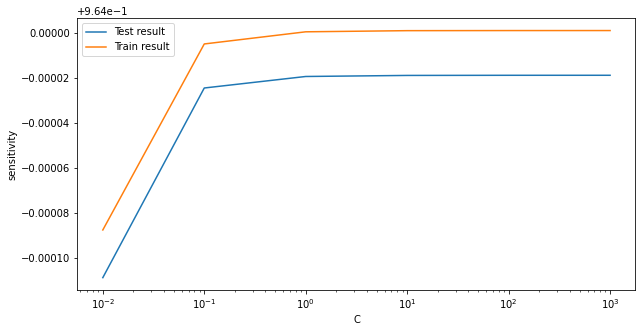

In [129]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_test_score'])
plt.plot(lr_model_cv_results['param_C'], lr_model_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [130]:
lr_model_cv.best_estimator_

LogisticRegression(C=1000)

In [131]:
# Instantiating the model
lr_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
lr_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

## Model Evaluation
- Prediction on train set

In [132]:
# Evaluating on test data
y_train_pred = lr_adasyn_model.predict(X_train_adasyn)
print('Classification report:\n',classification_report(y_train_adasyn, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227446

    accuracy                           0.89    454895
   macro avg       0.89      0.89      0.89    454895
weighted avg       0.89      0.89      0.89    454895



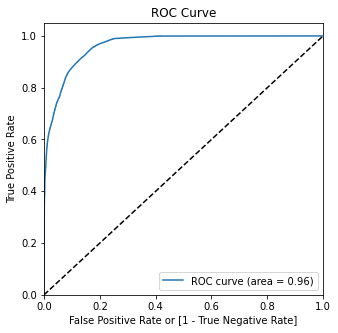

In [133]:
# Predicted probability
y_train_pred_proba = lr_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_adasyn, y_train_pred_proba)

## Model evaluation
- Prediction on test set

In [134]:
# Evaluating on test data
y_test_pred = lr_adasyn_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



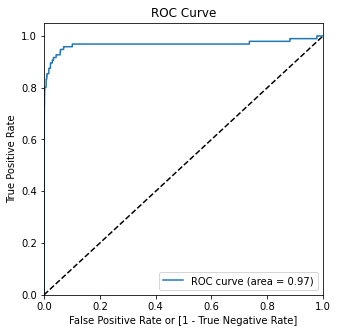

In [135]:
# Predicted probability
y_test_pred_proba = lr_adasyn_model.predict_proba(X_test)[:,1]
# Plotting the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Logistic regression with ADASYN on balanced data set - Model summary 
### Train set score
- ROC score 96 %
- F1 score 88 %

### Test set score
- ROC score 97 %
- F1 score 3 %

# 2. Decision  tree classifier with ADASYN on balanced dataset 

In [136]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtc = DecisionTreeClassifier()

dtc_grid_search = GridSearchCV(estimator = dtc, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
dtc_grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [137]:
# Optimal ROC curve score and hyperparameter Logistic regression with ADASYN
print('ROC AUC score: ', round(dtc_grid_search.best_score_,3))
# print the optimum value of hyperparameters
print('Hyperparameters: ', dtc_grid_search.best_params_)
print(dtc_grid_search.best_estimator_)

ROC AUC score:  0.946
Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [138]:
# cross validation results
dtc_grid_search_results = pd.DataFrame(dtc_grid_search.cv_results_)
dtc_grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.024817,0.091207,0.048230,0.001254,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.910244,0.924603,0.926033,0.909250,0.907991,0.915624,0.007960,8
1,10.933894,0.067045,0.051523,0.003699,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.910244,0.924603,0.926033,0.909250,0.907991,0.915624,0.007960,7
2,10.973410,0.037812,0.051124,0.004619,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.910115,0.925052,0.925887,0.909770,0.907963,0.915757,0.007968,6
3,10.961809,0.034002,0.051383,0.006201,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.910119,0.925052,0.925984,0.910456,0.907963,0.915915,0.007893,5
4,19.798316,0.188064,0.052828,0.005163,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917369,0.937551,0.942232,0.929917,0.968735,0.939161,0.017012,4
5,19.970055,0.139984,0.049794,0.002212,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.916838,0.937793,0.945611,0.933561,0.968409,0.940442,0.016855,3
6,19.811203,0.121859,0.050111,0.000694,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.928257,0.939529,0.945950,0.948049,0.967901,0.945937,0.012965,1
7,19.862022,0.200057,0.047078,0.006816,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.927759,0.943703,0.943312,0.945518,0.967245,0.945507,0.012614,2


In [139]:
# Build Model with optimal hyperparameters
dtc_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dtc_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

## model evaluation
- prediction on train set

In [140]:
# Evaluating model on the test data
y_train_pred = dtc_adasyn_model.predict(X_train_adasyn)
print('Classification report:\n',classification_report(y_train_adasyn, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    227449
           1       0.96      0.99      0.97    227446

    accuracy                           0.97    454895
   macro avg       0.97      0.97      0.97    454895
weighted avg       0.97      0.97      0.97    454895



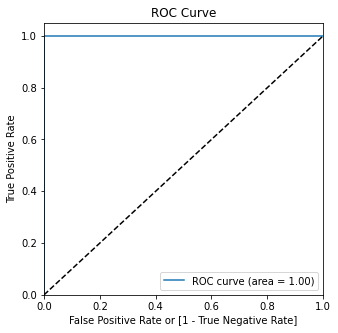

In [141]:
# Predicted probability
y_train_pred_proba = dtc_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_pred, y_train_pred_proba)

## model evaluation
- prediction on test set

In [142]:
# Evaluating model on the test data
y_test_pred = dtc_adasyn_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.79      0.06        96

    accuracy                           0.96     56962
   macro avg       0.52      0.87      0.52     56962
weighted avg       1.00      0.96      0.98     56962



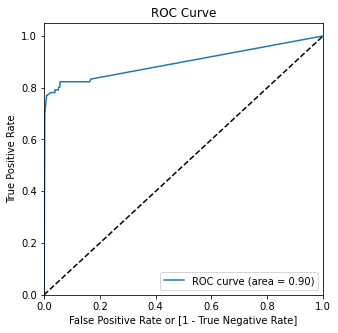

In [143]:
# Predicted probability
y_test_pred_proba = dtc_adasyn_model.predict_proba(X_test)[:,1]
# Plotting the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

## Decision tree classifier with ADASYN on balanced data set - Model summary 
### Train set score
- ROC score 100 %
- F1 score 97 %

### Test set score
- ROC score 90 %
- F1 score 6 %

# 3. XGboost with ADASYN on balanced data set

In [144]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
xgb_model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [145]:
# Optimal ROC curve score and hyperparameter Logistic regression with ADASYN
print('ROC AUC score: ', round(xgb_model_cv.best_score_,3))

# print the optimum value of hyperparameters
print('Hyperparameters: ', xgb_model_cv.best_params_)

print(xgb_model_cv.best_estimator_)

ROC AUC score:  0.99
Hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.3}
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.3)


In [146]:
# cross validation results
xgb_model_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,60.434344,0.254224,0.708982,0.003385,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.966345,0.995994,0.994283,0.985541,0.013591,6,0.999359,0.999187,0.999225,0.999257,0.000074
1,77.414030,0.263075,0.717361,0.027410,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969245,0.995401,0.993432,0.986026,0.011893,5,0.999307,0.999019,0.999121,0.999149,0.000120
2,81.549904,0.339810,0.711643,0.004261,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.969367,0.996384,0.993513,0.986421,0.012116,4,0.999363,0.999107,0.999168,0.999213,0.000109
3,60.289299,0.228050,0.711899,0.012094,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.975120,0.998606,0.996501,0.990076,0.010610,1,0.999915,0.999952,0.999965,0.999944,0.000021
4,77.353998,0.361174,0.707811,0.008948,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968993,0.997648,0.997339,0.987993,0.013436,2,0.999938,0.999955,0.999953,0.999949,0.000007
5,81.869185,0.035464,0.714169,0.009954,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.964176,0.997370,0.998188,0.986578,0.015844,3,0.999949,0.999936,0.999957,0.999947,0.000009


In [147]:
# Build model using chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

## model Evaluation
- Prediction on train set

In [148]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
print('Classification report:\n',classification_report(y_train_adasyn, y_train_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227449
           1       0.97      0.99      0.98    227446

    accuracy                           0.98    454895
   macro avg       0.98      0.98      0.98    454895
weighted avg       0.98      0.98      0.98    454895



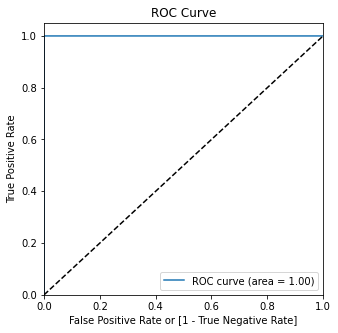

In [149]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
plot_roccurve(y_train_pred, y_train_pred_proba)

In [150]:
# Predicting on the train set
y_test_pred = xgb_adasyn_model.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



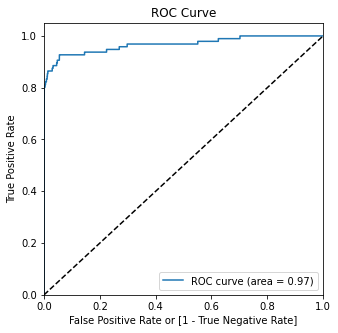

In [151]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roccurve(y_test, y_test_pred_proba)

In [157]:
# Accuracy
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))
print('Classification report:\n',classification_report(y_test, y_test_pred))
print('F1 Score: ', f1_score(y_test, y_test_pred))



[[54896  1970]
 [   11    85]]
Accuracy:- 0.9652224289877462
Sensitivity:- 0.8854166666666666
Specificity:- 0.9653571554180002
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962

F1 Score:  0.07903300790330078


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


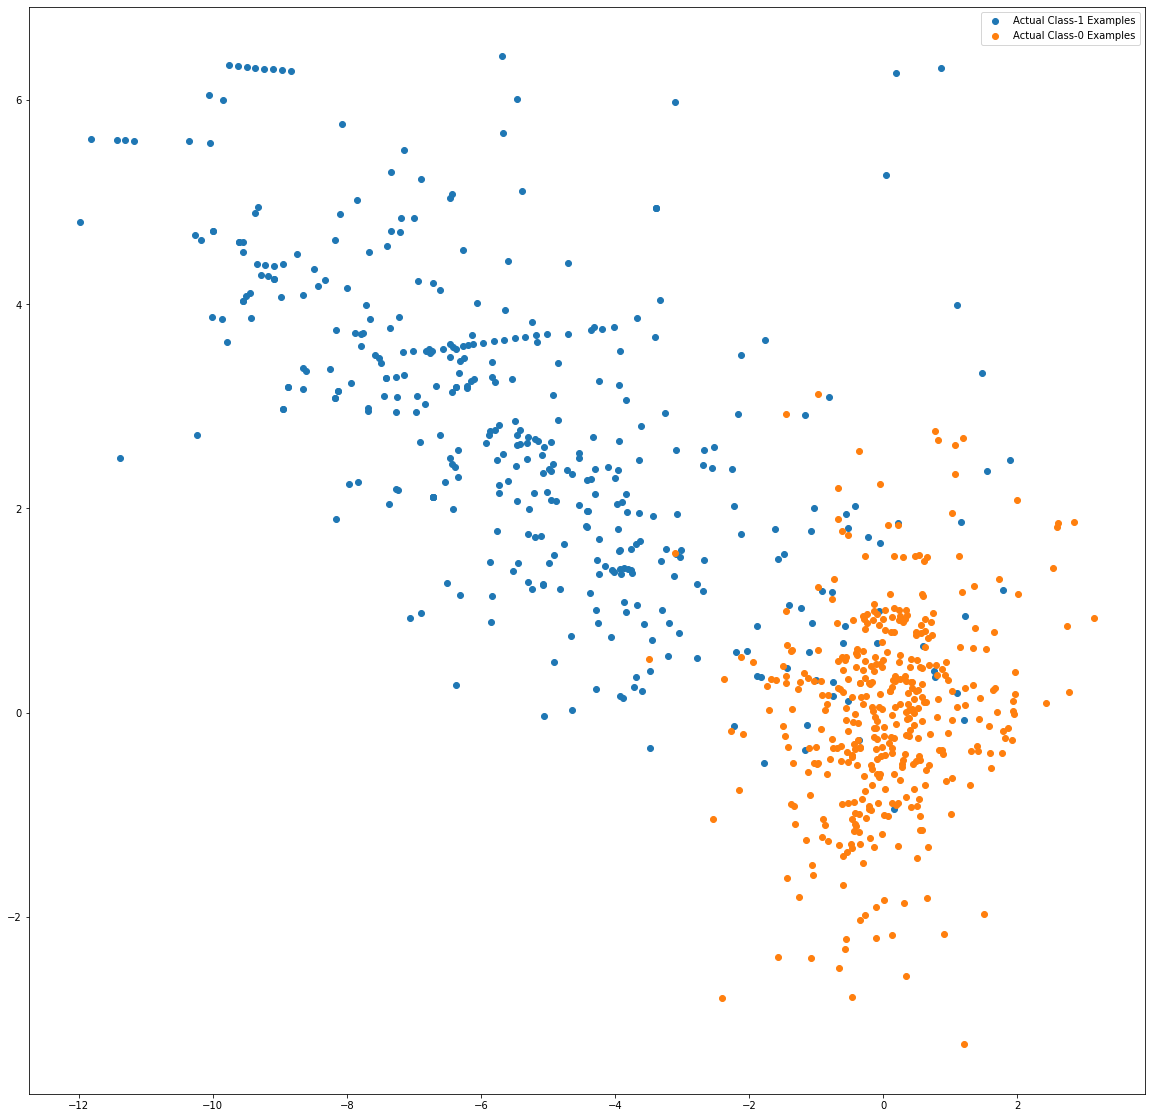

In [153]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [154]:
#### Print the FPR,TPR & select the best threshold from the roc curve

print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9967616542723794
0.54578215


Observation
- 100%  auc score on training data set
- 54 % is threshold where TPR is highest and FPR is lowest

## Observations:
- ### We have build a machine learning model that is capable of detecting fraudulent transactions and also understood  how to handle class imbalances present in any data set, along with model selection and hyperparameter tuning.
- ### Out of a total of 2,84,807 transactions, 492 were fraudulent.Data set is highly imbalanced. Skewness in the data has been delt with.
- ### Data has been splitted into Train and Test data to check perform the performance of  models with unseen data. k-fold cross-validation method has been used for validation.

## Summary
- ###  Need to  focus on a high recall to detect actual fraudulent transactions in order to save bank from high-value fraudulent transactions.
- ### After performing evaluations of all the models we have come to conclusion that XGBoost model has good ROC score.Hence we go with XGBoost model